importing required lybraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.ticker import AutoMinorLocator
import warnings
warnings.filterwarnings('ignore')
from math import ceil, floor
import re

loading the dataset as data

In [2]:
data = pd.read_excel("/content/1673873388_rolling_stones_spotify.xlsx")
data.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [3]:
data.shape

(1610, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1610 non-null   int64         
 1   name              1610 non-null   object        
 2   album             1610 non-null   object        
 3   release_date      1610 non-null   datetime64[ns]
 4   track_number      1610 non-null   int64         
 5   id                1610 non-null   object        
 6   uri               1610 non-null   object        
 7   acousticness      1610 non-null   float64       
 8   danceability      1610 non-null   float64       
 9   energy            1610 non-null   float64       
 10  instrumentalness  1610 non-null   float64       
 11  liveness          1610 non-null   float64       
 12  loudness          1610 non-null   float64       
 13  speechiness       1610 non-null   float64       
 14  tempo             1610 n

In [5]:
data.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [6]:
data = data.drop(columns=['Unnamed: 0'],axis =1)
data.shape

(1610, 17)

checking null values/duplicate values and outliers

In [7]:
data.isnull().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [8]:
data.duplicated().sum()

0

there is no null values and duplicate values found

In [9]:
data['Year'] = pd.DatetimeIndex(data['release_date']).year
data.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,Year
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,2022
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,2022
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,2022
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,2022
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,2022


In [10]:
most_popular = data.query('popularity>60',inplace = False).sort_values('popularity',ascending = 0)
most_popular[:6]

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,Year
1403,"Paint It, Black",Aftermath,1966-04-15,1,63T7DJ1AFDD6Bn8VzG6JE8,spotify:track:63T7DJ1AFDD6Bn8VzG6JE8,0.0493,0.464,0.795,0.002440,0.3990,-9.267,0.0926,158.691,0.612,80,202266,1966
862,Start Me Up - Remastered 2009,Tattoo You (2009 Re-Mastered),1981-08-24,1,7HKez549fwJQDzx3zLjHKC,spotify:track:7HKez549fwJQDzx3zLjHKC,0.0436,0.631,0.932,0.137000,0.0918,-4.142,0.0354,122.429,0.971,76,213066,1981
1248,Gimme Shelter,Let It Bleed,1969-12-05,1,6H3kDe7CGoWYBabAeVWGiD,spotify:track:6H3kDe7CGoWYBabAeVWGiD,0.4470,0.634,0.630,0.039000,0.1700,-8.277,0.0310,118.628,0.489,76,270773,1969
1472,(I Can't Get No) Satisfaction - Mono Version,Out Of Our Heads,1965-07-30,7,2PzU4IB8Dr6mxV3lHuaG34,spotify:track:2PzU4IB8Dr6mxV3lHuaG34,0.0383,0.723,0.863,0.031700,0.1280,-7.890,0.0338,136.302,0.931,76,222813,1965
1257,Sympathy For The Devil - 50th Anniversary Edition,Beggars Banquet (50th Anniversary Edition),1968-12-06,1,1Ud6moTC0KyXMq1Oxfien0,spotify:track:1Ud6moTC0KyXMq1Oxfien0,0.5180,0.702,0.668,0.000000,0.0588,-9.237,0.2140,116.063,0.561,73,378146,1968
901,Beast Of Burden - Remastered 1994,Some Girls,1978-06-09,9,77oU2rjC5XbjQfNe3bD6so,spotify:track:77oU2rjC5XbjQfNe3bD6so,0.3900,0.783,0.878,0.000778,0.0426,-3.864,0.0308,100.626,0.885,72,265173,1978


In [11]:
data['duration'] = data['duration_ms'].apply(lambda x: round(x/1000))
data.drop('duration_ms',inplace = True ,axis =1)

In [12]:
corr = data.drop(columns = ['name', 'album', 'release_date', 'track_number', 'id', 'uri','Year']).corr()

Text(0.5, 1.0, 'Heatmap of Correlation b/w Features')

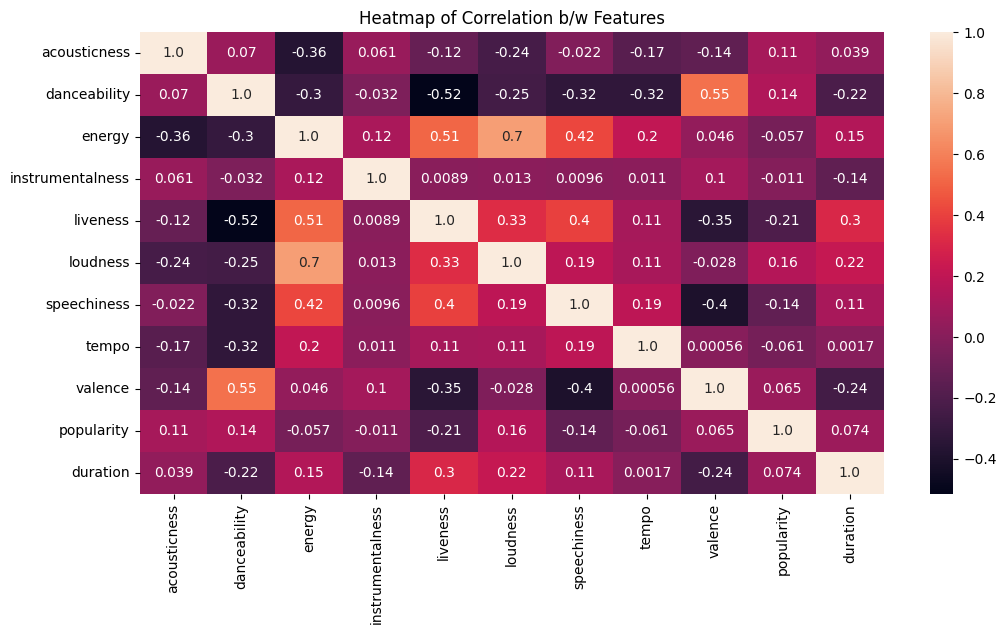

In [13]:
plt.figure(figsize = (12,6))
sns.heatmap(corr,annot = True ,fmt = '0.2')
plt.title('Heatmap of Correlation b/w Features')

Text(0.5, 1.0, 'Loudness v/s Energy Correlation')

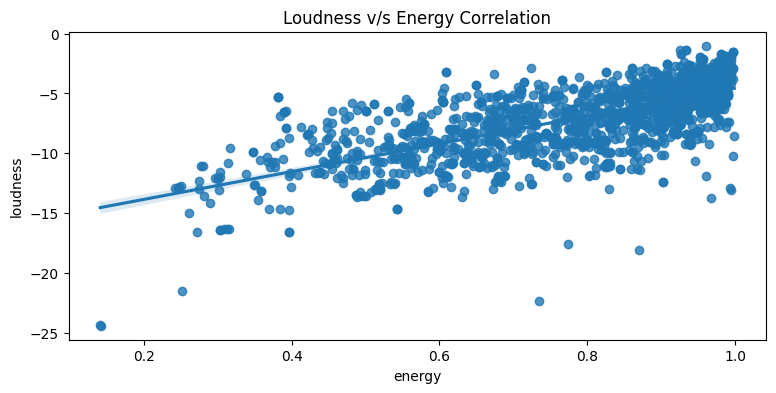

In [14]:
plt.figure(figsize = (9,4))
sns.regplot(data,x='energy',y='loudness')
plt.title('Loudness v/s Energy Correlation')

Text(0.5, 1.0, 'Liveness v/s Danceability Correlation')

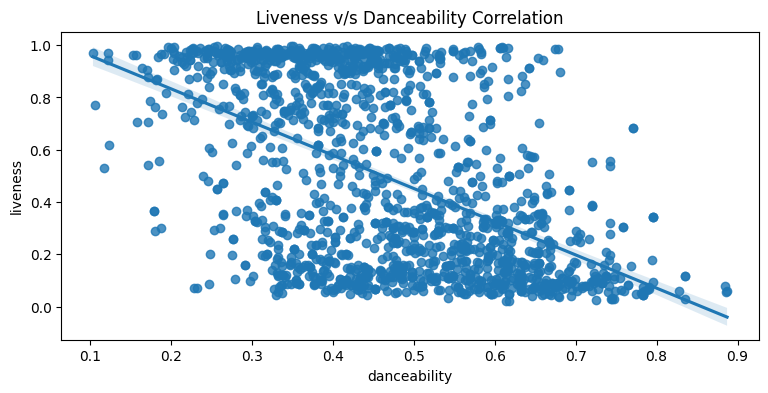

In [15]:
plt.figure(figsize = (9,4))
sns.regplot(data,x='danceability',y='liveness')
plt.title('Liveness v/s Danceability Correlation')

Text(0.5, 1.0, 'Acousticness v/s Popularity Correlation')

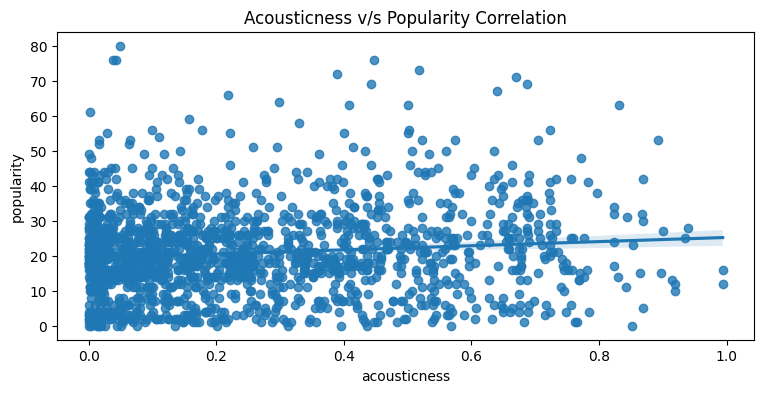

In [16]:
plt.figure(figsize = (9,4))
sns.regplot(data,y='popularity',x='acousticness')
plt.title('Acousticness v/s Popularity Correlation')

Text(0.5, 1.0, 'Acousticness v/s Energy Correlation')

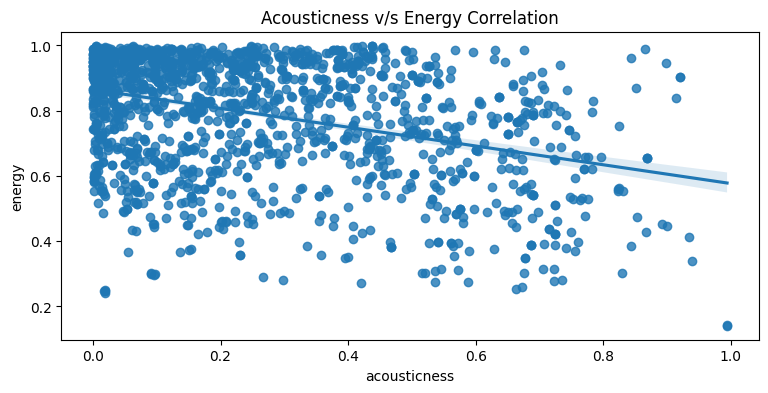

In [17]:
plt.figure(figsize = (9,4))
sns.regplot(data,y='energy',x='acousticness')
plt.title('Acousticness v/s Energy Correlation')

Text(0.5, 1.0, 'Energy vs Liveness with respect to Popularity')

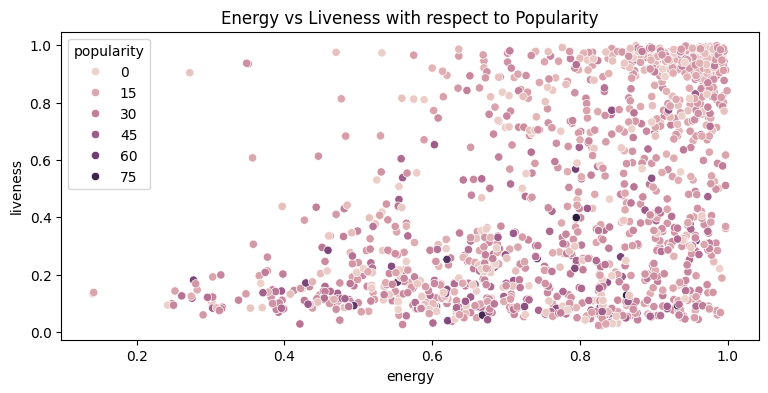

In [18]:
plt.figure(figsize = (9,4))
sns.scatterplot(data,x='energy',y='liveness',hue='popularity')
plt.title('Energy vs Liveness with respect to Popularity')

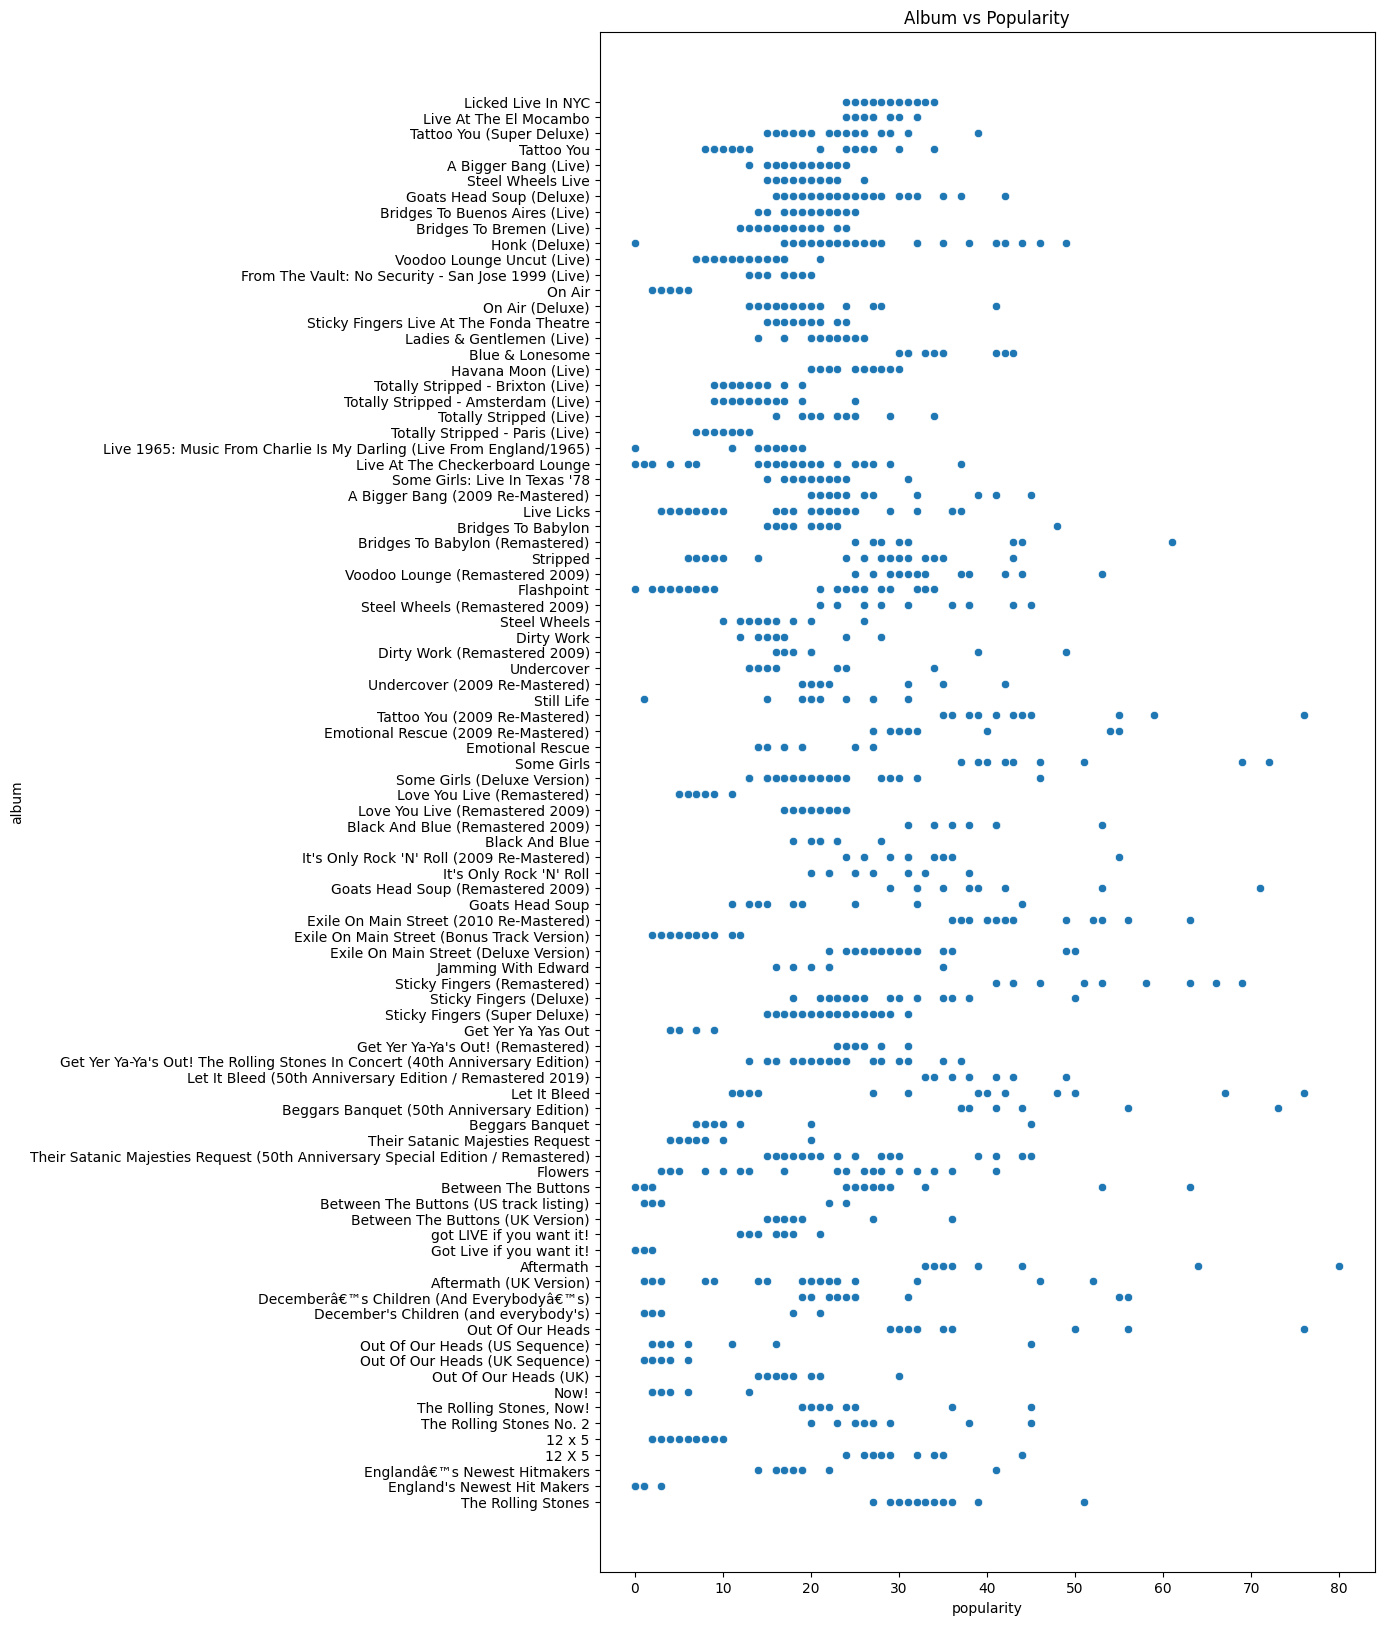

In [19]:
plt.figure(figsize=(10,20))
sns.scatterplot(y=data['album'],x=data['popularity'])
plt.title('Album vs Popularity')
plt.show()

Text(0.5, 1.0, 'Energy vs Liveness')

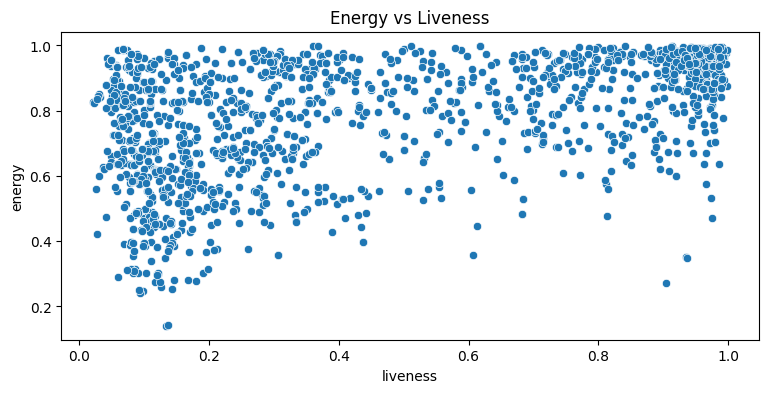

In [20]:
plt.figure(figsize = (9,4))
sns.scatterplot(data,y='energy',x='liveness')
plt.title('Energy vs Liveness')

Text(0, 0.5, 'Album')

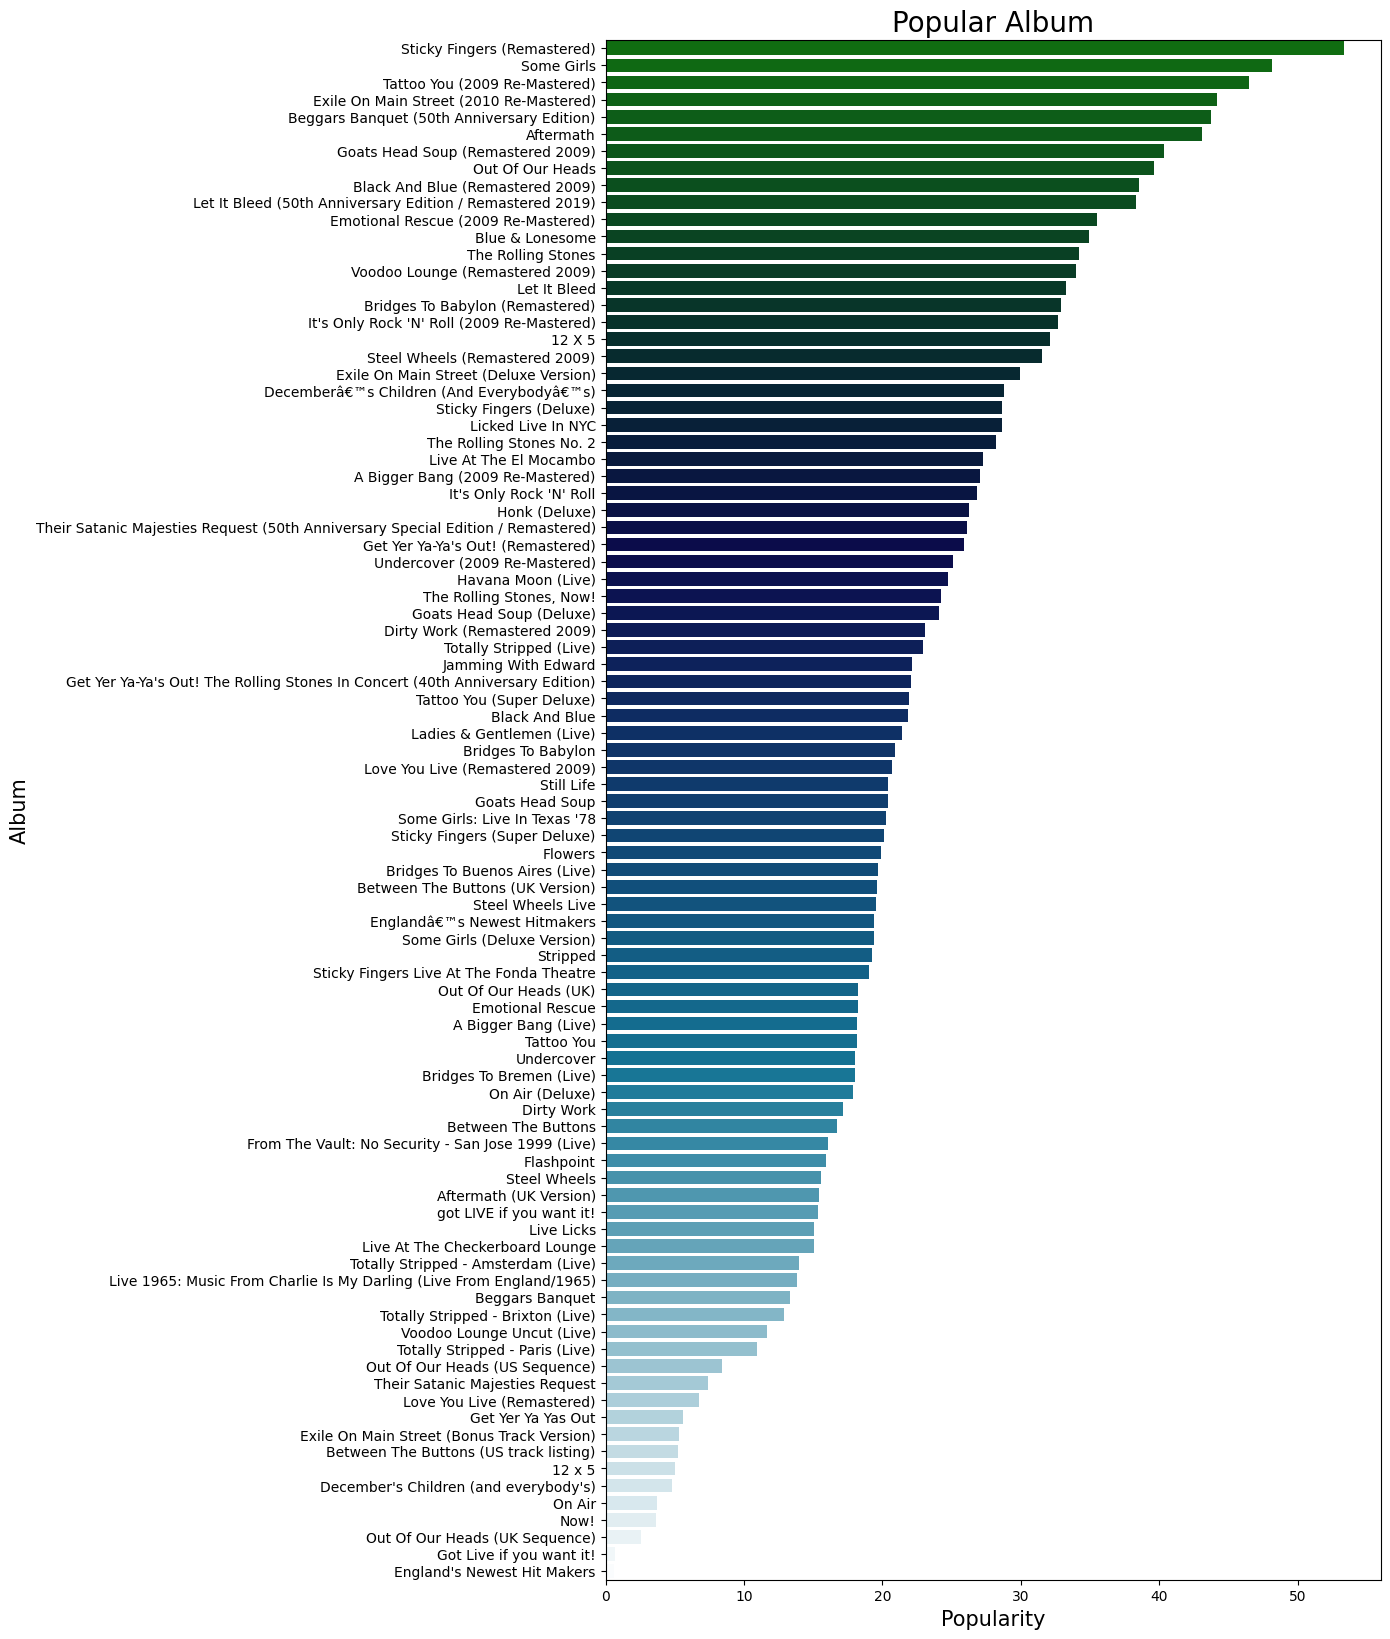

In [21]:
popular_album = data.groupby('album')['popularity'].mean().sort_values(ascending=0)

plt.figure(figsize = (10,20))
sns.barplot(data = data , y='album',x= 'popularity', order = popular_album.index,
            errorbar=('ci', False),palette='ocean')
plt.title('Popular Album', size = 20)
plt.xlabel('Popularity', size = 15)
plt.ylabel('Album', size = 15)

##Recommendation:
 Two albums that should be recommended to anyone based on the number of popular songs in an album are

1. Sticky Fingers (Remastered)                   53.300000

2. Some Girls                                    48.100000

Text(0.5, 1.0, 'Popularity wrt Release Year')

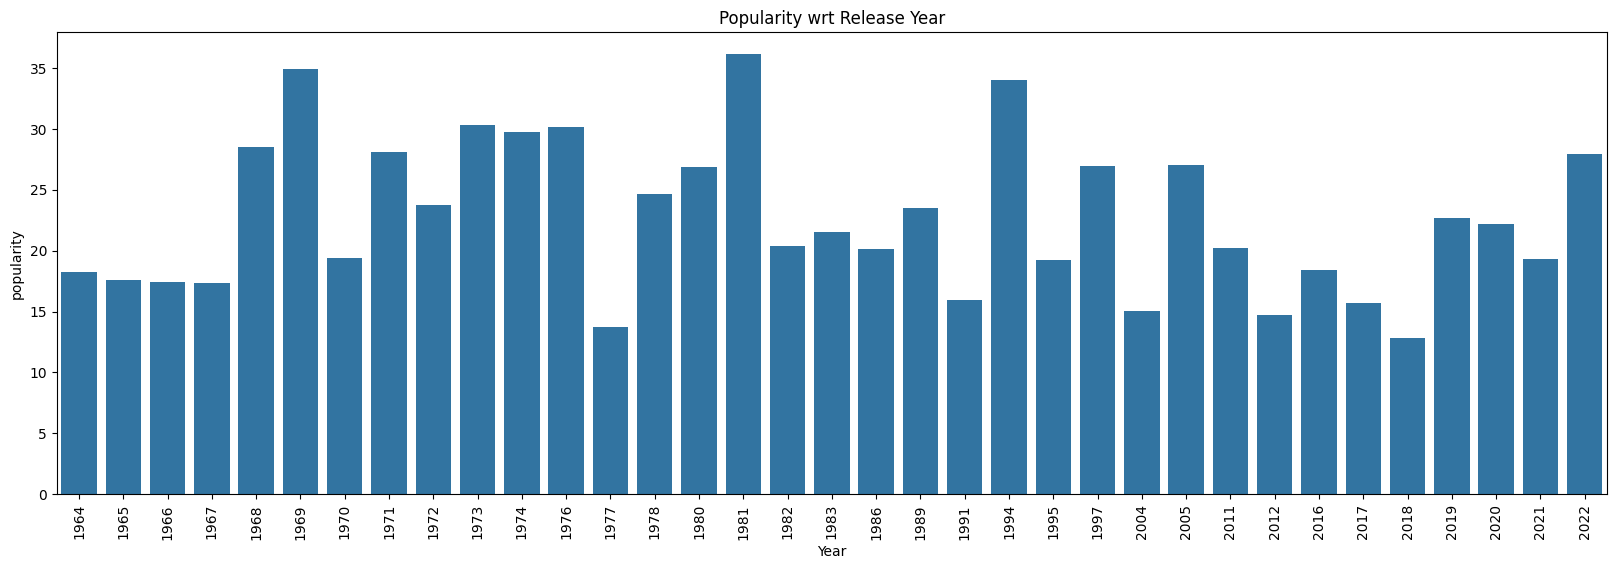

In [22]:
plt.figure(figsize = (20,6))
sns.barplot(data,x=data['Year'].sort_values(ascending=True),y='popularity',errorbar= ('ci',False))
plt.xticks(rotation='vertical')
plt.title('Popularity wrt Release Year')

Text(0.5, 1.0, 'Loudness wrt Release Year')

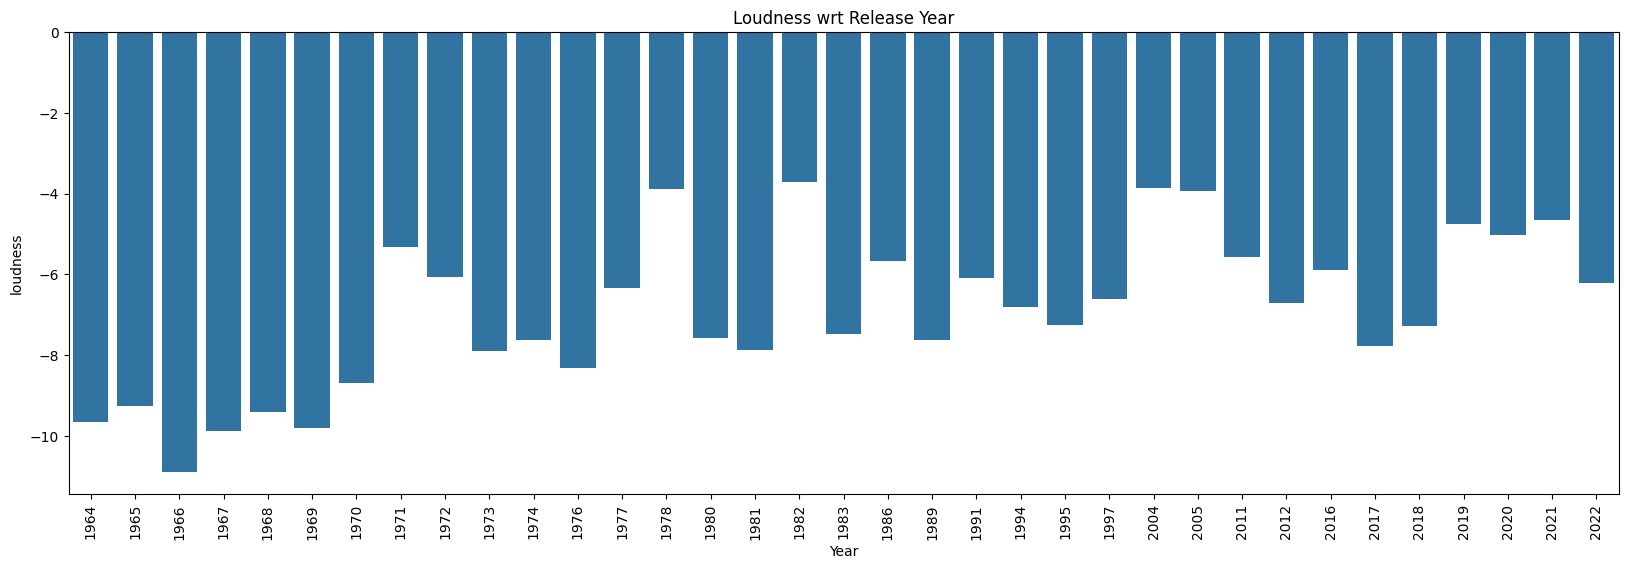

In [23]:
plt.figure(figsize = (20,6))
sns.barplot(data,x=data['Year'].sort_values(ascending=True),y='loudness',errorbar= ('ci',False))
plt.xticks(rotation='vertical')
plt.title('Loudness wrt Release Year')

Text(0.5, 1.0, 'energy wrt Release Year')

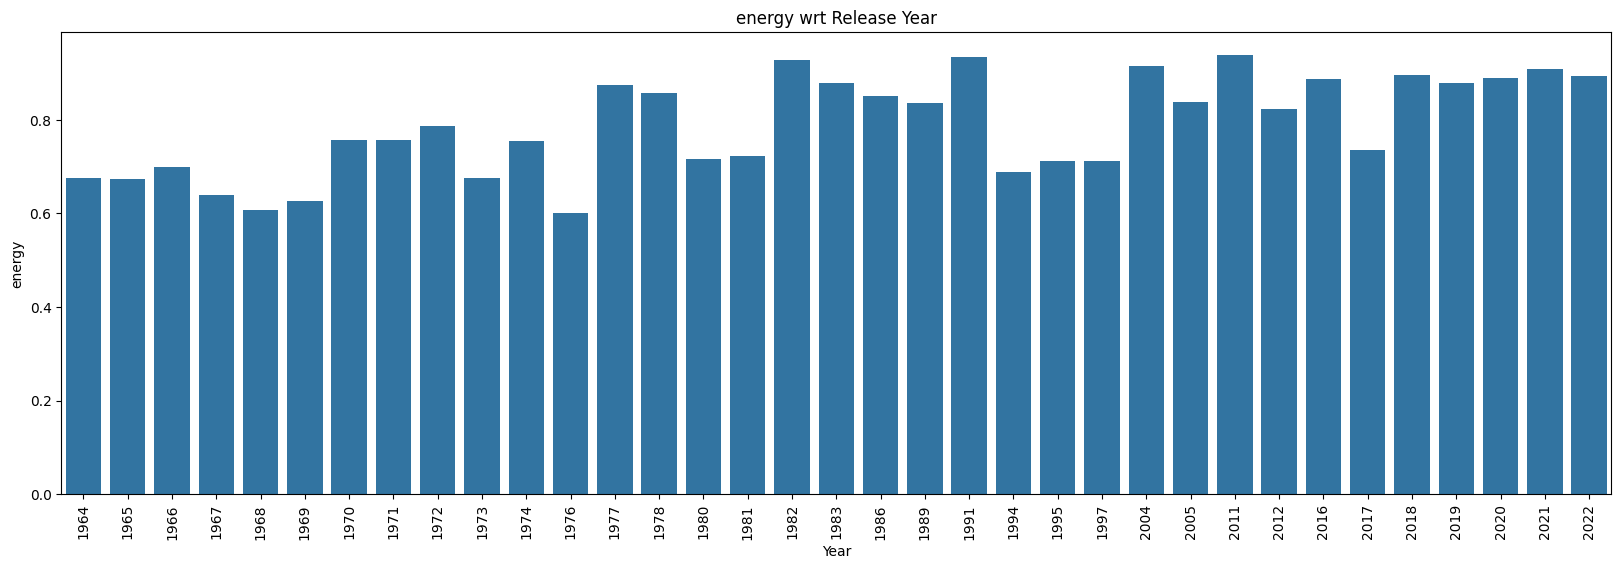

In [24]:
plt.figure(figsize = (20,6))
sns.barplot(data,x=data['Year'].sort_values(ascending=True),y='energy',errorbar= ('ci',False))
plt.xticks(rotation='vertical')
plt.title('energy wrt Release Year')

Text(0.5, 1.0, 'liveness wrt Release Year')

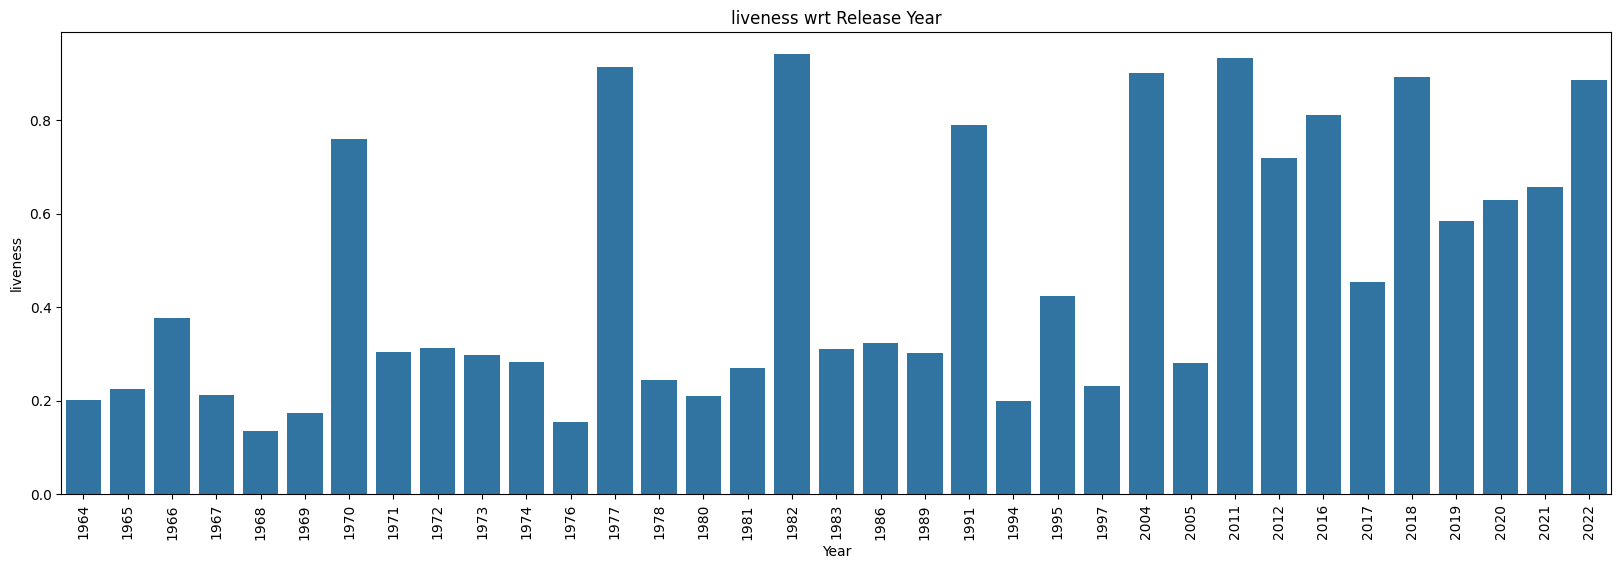

In [25]:
plt.figure(figsize = (20,6))
sns.barplot(data,x=data['Year'].sort_values(ascending=True),y='liveness',errorbar= ('ci',False))
plt.xticks(rotation='vertical')
plt.title('liveness wrt Release Year')

Here we scan see that in all three bargraphs loudness, energy and liveness in songs is increasing over the period of time.

In past years there are some spikes for the live song performance but on an average it increases over the period of time.

In [26]:
df = data.drop(['name','release_date','track_number','album','id','uri','Year'],axis=1)
df.shape

(1610, 11)

<Axes: ylabel='duration'>

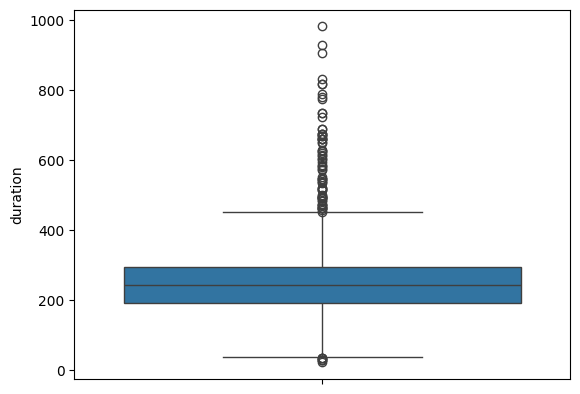

In [27]:
sns.boxplot(df['duration'])

In [28]:
def detect_outliers_using_iqr(X, column_name, capping):
    outdf = X.copy(deep=True)
    Q1 = outdf[column_name].quantile(0.25)
    Q3 = outdf[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    if capping == False:
        outliers = outdf[(outdf[column_name] < lower_limit) | \
                        (outdf[column_name] > upper_limit)]
        return outliers.index
    else:
        # Perform cappping and return actual values after capping
        outdf[column_name] = np.where(outdf[column_name] < lower_limit, \
                                   lower_limit, outdf[column_name])
        outdf[column_name] = np.where(outdf[column_name] > upper_limit, \
                                   upper_limit, outdf[column_name])
        return outdf[column_name]

def corrrect_outliers_in_X_using_iqr(X, column_list):
    outdf = X.copy(deep=True)
    for column_name in column_list:
        indexes = detect_outliers_using_iqr(outdf, column_name, False)
        if indexes.empty == True:
            print(f'No outliers detected in column = {column_name}')
        else:
            result = detect_outliers_using_iqr(outdf, column_name, True)
            index_string = ', '.join(str(e) for \
                                     e in re.findall(r'\b\d+\b',str(indexes)))
            print(f'Capping outliers at indexes {index_string}' + \
                  f' for column = {column_name}')
            outdf[column_name] = result
    return outdf

def get_df_changes(original_df, new_df):
    mask = original_df.ne(new_df)
    changed_rows = new_df[mask]
    changed_rows = changed_rows.dropna(how='all')
    changed_features = mask.any().loc[lambda x : x==True].index.tolist()
    return changed_rows, changed_features

In [29]:
df_no_outlier = \
    corrrect_outliers_in_X_using_iqr(\
       df, \
        ['acousticness', \
        'danceability', \
        'energy', \
        'instrumentalness', \
        'liveness', \
        'loudness', \
        'speechiness', \
        'tempo', \
        'valence', \
        'popularity',\
        'duration'])

Capping outliers at indexes 165, 807, 818, 997 for column = acousticness
No outliers detected in column = danceability
Capping outliers at indexes 807, 818, 1115, 1118, 1313, 1325, 1333, 1369 for column = energy
Capping outliers at indexes 0, 18, 20, 22, 40, 42, 66, 67, 68, 69, 1576, 1577, 1578, 1586, 1588, 1589, 1590, 1599, 1600, 1602, 272 for column = instrumentalness
No outliers detected in column = liveness
Capping outliers at indexes 300, 328, 546, 739, 756, 807, 818, 1118, 1186, 1310, 1322, 1405, 1416, 1430 for column = loudness
Capping outliers at indexes 3, 10, 58, 69, 71, 81, 111, 113, 118, 128, 144, 162, 189, 190, 191, 194, 197, 198, 200, 201, 202, 203, 204, 212, 213, 217, 220, 224, 260, 280, 281, 284, 286, 292, 295, 299, 308, 309, 312, 314, 320, 323, 327, 337, 342, 344, 348, 491, 502, 528, 538, 553, 558, 599, 600, 604, 625, 629, 635, 642, 646, 647, 654, 658, 664, 765, 769, 770, 804, 805, 815, 816, 818, 829, 850, 874, 897, 907, 929, 950, 963, 968, 978, 981, 993, 1170, 1176, 1

<Axes: ylabel='duration'>

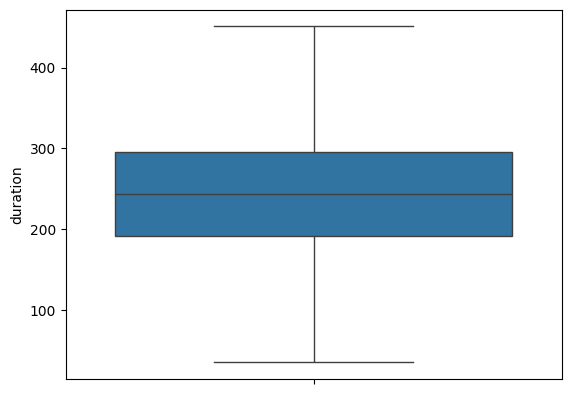

In [30]:
sns.boxplot(df_no_outlier['duration'])

In [31]:
df_no_outlier.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration
0,0.0824,0.463,0.993,0.447171,0.932,-12.913,0.11000,118.001,0.0302,33.0,49.0
1,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.07590,131.455,0.3180,34.0,253.0
2,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.11500,130.066,0.3130,34.0,263.0
3,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.16175,132.994,0.1470,32.0,306.0
4,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.09300,130.533,0.2060,32.0,305.0


In [32]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
aa = mms.fit_transform(df_no_outlier)
aa

array([[0.08937664, 0.45849298, 0.99179768, ..., 0.03100616, 0.6875    ,
        0.03365385],
       [0.47404165, 0.2835249 , 0.95352016, ..., 0.32648871, 0.70833333,
        0.52403846],
       [0.45126115, 0.36015326, 0.95898838, ..., 0.32135524, 0.70833333,
        0.54807692],
       ...,
       [0.4024458 , 0.8761175 , 0.69241285, ..., 0.85728953, 0.625     ,
        0.33894231],
       [0.2353888 , 0.76117497, 0.38072454, ..., 0.54620123, 0.5625    ,
        0.20913462],
       [0.41546323, 0.79565773, 0.91114149, ..., 0.99486653, 0.72916667,
        0.37019231]])

In [33]:
aa = pd.DataFrame(aa,columns=df_no_outlier.columns)

Text(0.5, 1.0, 'Mean Values of Audio Features')

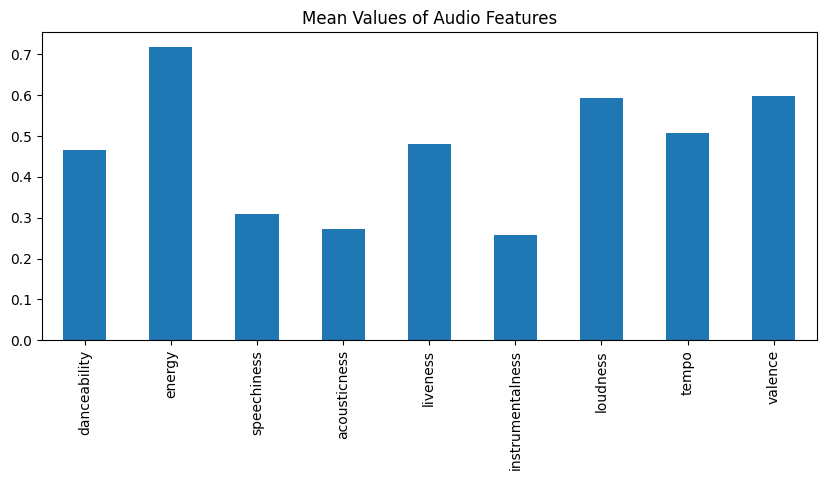

In [34]:
small = aa[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness','instrumentalness','loudness','tempo','valence']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')

In [35]:
X = aa.drop(['popularity'],axis=1)
Y = aa['popularity']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2,random_state = 42)

In [36]:
X.shape,Y.shape

((1610, 10), (1610,))

In [37]:
X_train.shape,X_test.shape

((1288, 10), (322, 10))

In [38]:
pca = PCA()
pca.fit(X_train)

PCA()

In [39]:
threshold = 0.95
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= threshold) + 1
print(f"{format(threshold,'.1%')} variance threshold results in {d} principal components")

95.0% variance threshold results in 8 principal components


Since the X_train contains 10 features, to visualize these features against clusters we reduce the dimensions to 2 using PCA and then visualize the features against the clusters they are assigned to.

In [40]:
pca_x = PCA(n_components=2)
X_pca = pca_x.fit_transform(X_train)
X_pca.shape

(1288, 2)

##Cluster Analysis

We implement helper function to visualize clusters used by clusterers we run later



In [41]:
def plot_data(X,c):
    plt.scatter(X[:, 0], X[:, 1], c=c, s=12, cmap='viridis')

def plot_decision_boundaries(clusterer_name, clusterer, X, y_pred, cluster_num, \
                             show_centroids=True):
  plot_data(X,y_pred)

In [42]:
cluster_values = [ 2, 3, 4, 5 ]
kmeans_list = []
for cluster_num in range(len(cluster_values)):
    print('Performing KMeans clustering using ' + \
          f'{cluster_values[cluster_num]} clusters...', end='')
    kmeans = KMeans(n_clusters=cluster_values[cluster_num], random_state=42)
    y_train_pred = kmeans.fit_predict(X_train)
    print('Done')
    kmeans_list.append( \
        { \
            'model' : kmeans, \
            'y_pred' : y_train_pred, \
            'clusters' : cluster_values[cluster_num], \
            'inertia' : kmeans.inertia_, \

        } \
    )
kmeans_df = pd.DataFrame(kmeans_list)

Performing KMeans clustering using 2 clusters...Done
Performing KMeans clustering using 3 clusters...Done
Performing KMeans clustering using 4 clusters...Done
Performing KMeans clustering using 5 clusters...Done


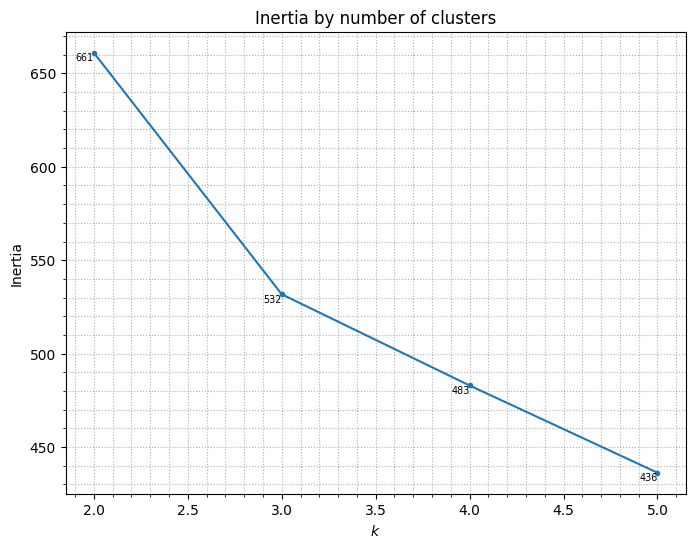

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(visible=True, which='both', linestyle='dotted')
plt.plot(kmeans_df.clusters, kmeans_df.inertia, marker=".")
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.title('Inertia by number of clusters')
for i in range(kmeans_df.shape[0]):
    plt.text(kmeans_df.clusters.iloc[i], kmeans_df.inertia.iloc[i], \
             f"{format(kmeans_df.inertia.iloc[i].round(2),'.0f')}", ha='right', va='top',fontsize='x-small')
plt.show()

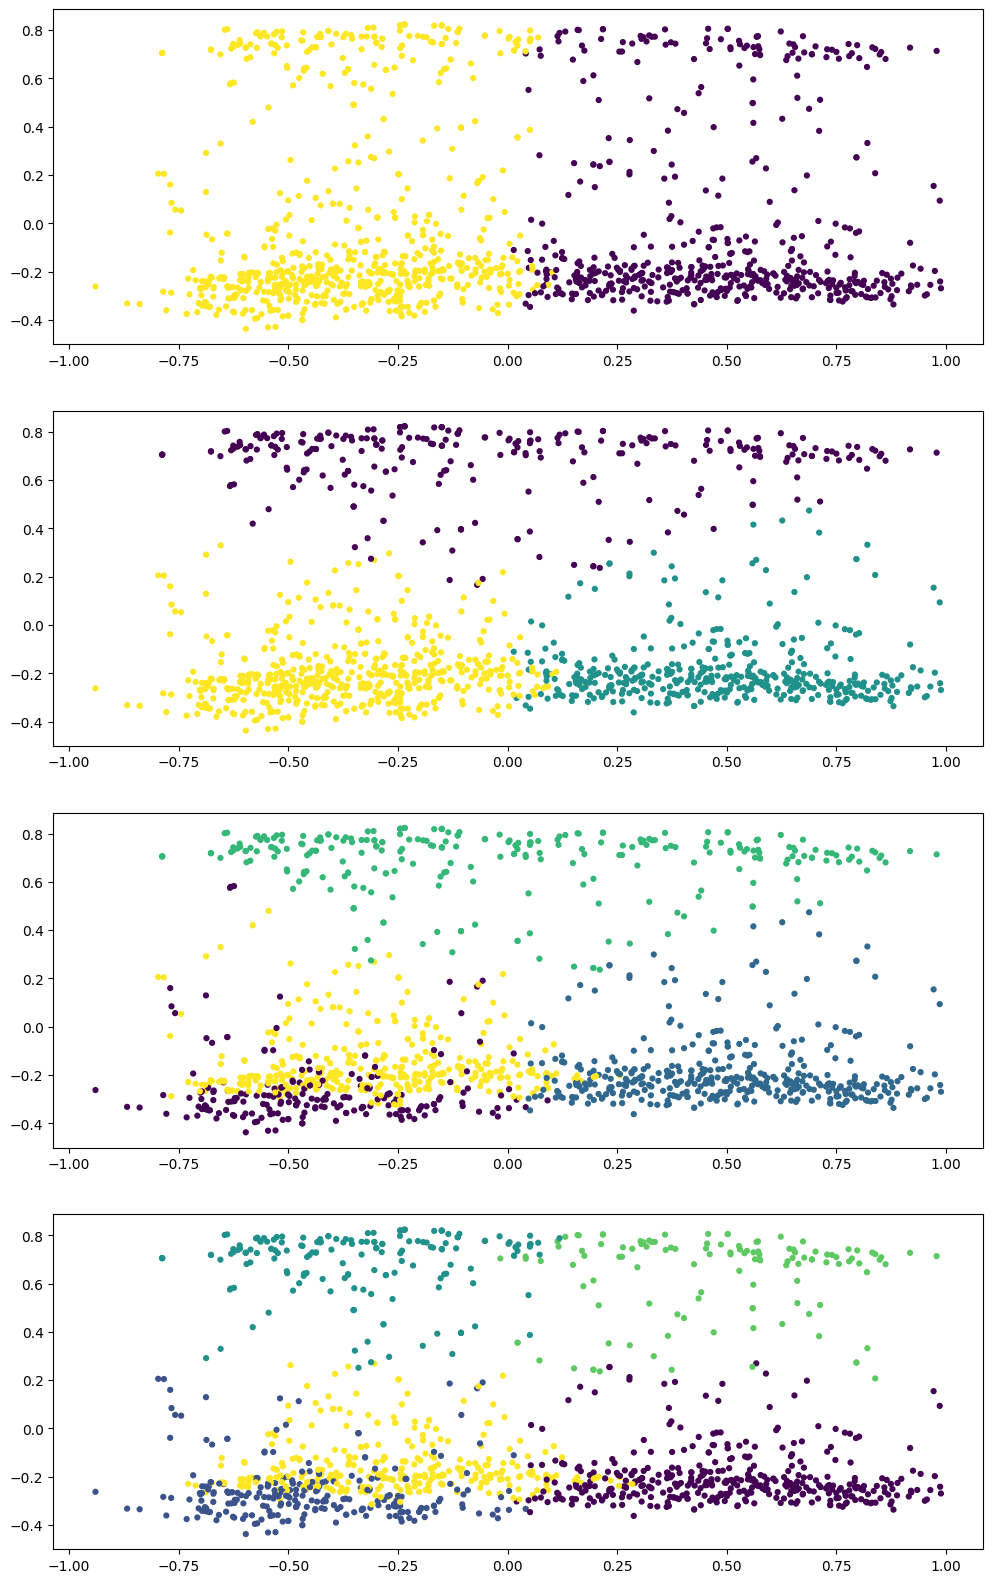

In [44]:
plt.figure(figsize=(12, 20))
for i in range(kmeans_df.shape[0]):
    plt.subplot(kmeans_df.shape[0], 1, i+1)
    plot_decision_boundaries('k-means clustering', \
                             kmeans_df.model.iloc[i], X_pca, \
                             kmeans_df.y_pred.iloc[i], kmeans_df.clusters.iloc[i])
plt.show()

In [45]:
df_train = pd.DataFrame(X_train, columns=X_train.columns)
df_train['cluster'] = kmeans_list[1]['y_pred']
cluster_characteristics = df_train.groupby('cluster').mean()
cluster_characteristics

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
cluster,,,,,,,,,,
0,0.297888,0.454805,0.766737,0.937396,0.483960,0.594555,0.307954,0.518329,0.645679,0.453956
1,0.221553,0.356747,0.874689,0.070508,0.851502,0.689641,0.495997,0.541871,0.488136,0.618682
2,0.299282,0.555282,0.590684,0.067515,0.204214,0.521294,0.181285,0.485455,0.659615,0.471070


Songs with low acousticness which are high on energy and loudness scores. These songs typically use acoustic and non-eletronic instruments.. These songs are often characterized by a calm, soothing and relaxed sound

Songs which are high on liveness, energy and speechiness. These are typically live rock and rap songs. Lick rock songs are frequently recorded at live performance and tend to have high energy. Rap songs score high on speeciness because they contain more spoken words. They can also be high on energy, if the rap is fast-paced.

##Conclusion
Finally, our analysis is completed. The songs in the clusters might not be compatible with the genres in your mind and seem irrelevant. But please keep in mind that this work is based on the features, which are mostly technical indicators, provided by Spotify and the outputs are highly dependent on them. Regarding the quality of the results, I think they are not perfect but reasonable and they are convenient to be used for recommendation purposes. A person who listens to a song from a cluster might be delighted to hear another one from the same list. In a similar way, you can analyze your own playlists and discover hidden gems that you may like.